In [1]:
import pandas as pd
import numpy as np
import datetime
import requests
from portfoliomaker import createPortfolio 
import matplotlib.pyplot as plt
import json
from itertools import islice

In [2]:
with open('SnP500.txt', 'r') as f:
    SnP = ''.join(f.readlines()).split()

In [ ]:
identifiers = "/".join(SnP)

In [3]:
data = {}
for stock in SnP:
    portfolioAnalysisRequest = requests.get("https://www.blackrock.com/tools/hackathon/performance?" \
                 + "betaPortfolios=SNP500&endDate=20171231&identifiers="+stock \
                 + "&riskFreeRatePortfolio=LTBILL1-3M&startDate=20170101").json()
    data[stock] = portfolioAnalysisRequest

In [4]:
with open('data.json', 'w') as outfile: 
    json.dump(data, outfile)

In [ ]:
failed = []
for stock in SnP:
    if stock not in data.keys():
        failed.append(stock)
        SnP.remove(stock)

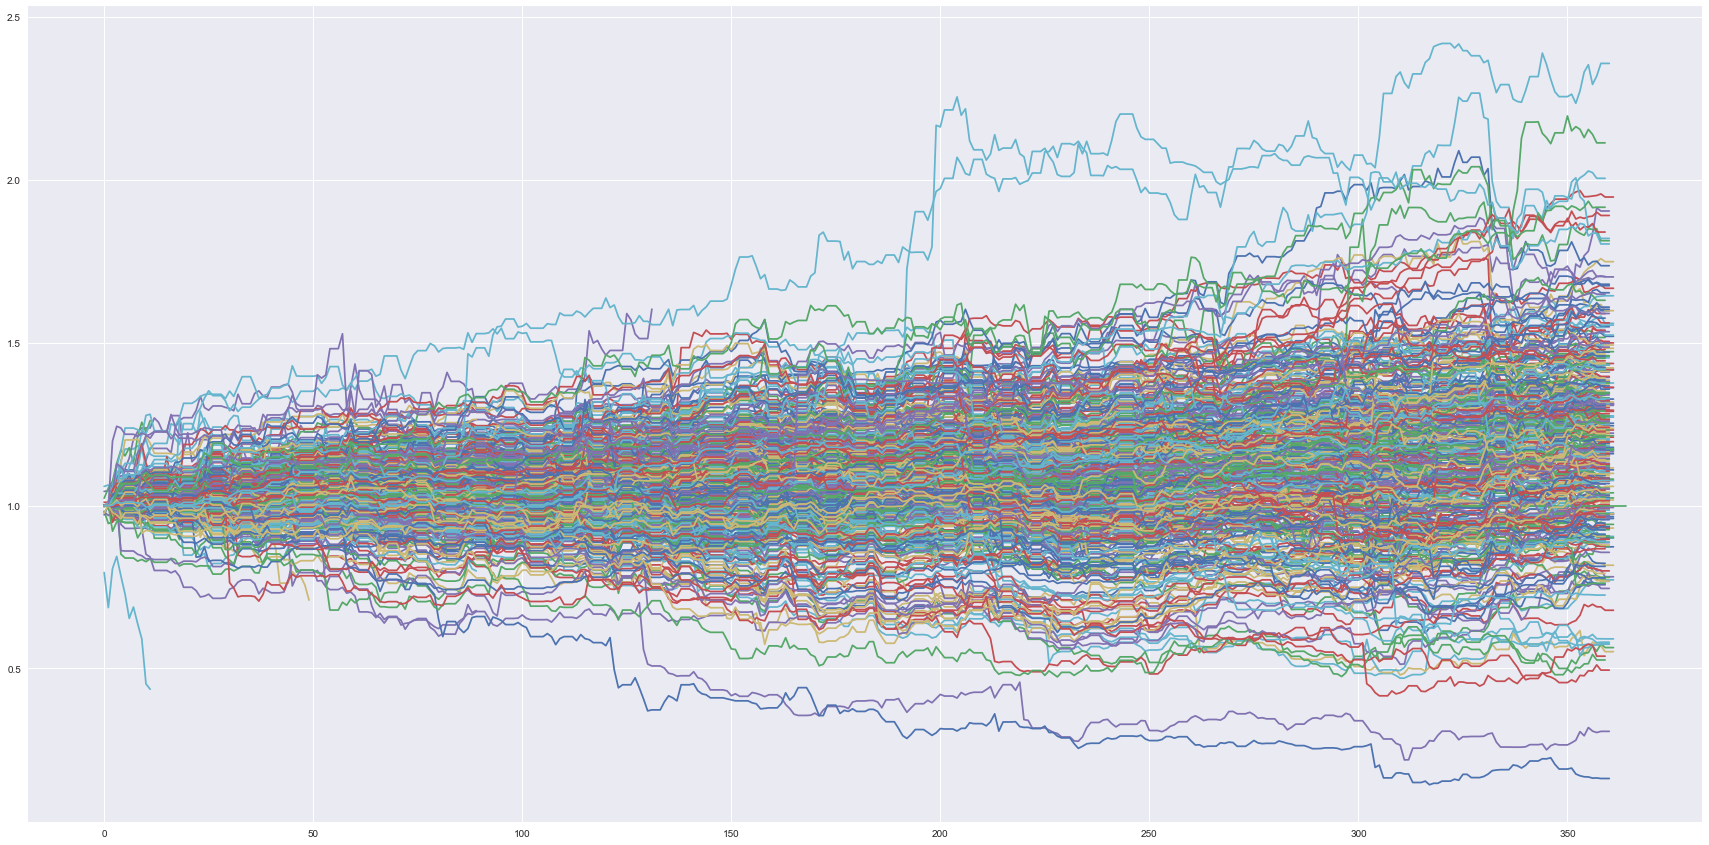

In [5]:
fig, ax = plt.subplots(figsize=(30,15))
for stock in SnP:
    if data[stock]['success'] == True:
        Y = [y[1] for y in islice(data[stock]['resultMap']['RETURNS'][0]['performanceChart'], 0, None, 1)]
        X = list(range(len(Y)))
        plt.plot(X,Y)

plt.show()